In [13]:
import pandas as pd

# 載入資料集
file_path = 'HR_capstone_dataset.csv'
data = pd.read_csv(file_path)

print(data.info())
data.head(3)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium


## 欄位敘述
```
satisfaction_level (float64): 員工滿意度
last_evaluation (float64): 上次評估
number_project (int64): 參與的專案數量
average_montly_hours (int64): 每月平均工時
time_spend_company (int64): 在公司工作的年資
Work_accident (int64): 是否發生過工作意外或者事故
left (int64): 員工是否離職
promotion_last_5years (int64): 過往五年是否有晉升
Department (object): 員工所在部門
salary (object): 薪資等级（低、中、高）
```

In [14]:
# 首先先將資料轉換成數值型資料

from sklearn.preprocessing import LabelEncoder

# 使用 label encoder 將 category 的資料轉換成數值型的
label_enc_department = LabelEncoder()
label_enc_salary = LabelEncoder()

data['Department'] = label_enc_department.fit_transform(data['Department'])
data['salary'] = label_enc_salary.fit_transform(data['salary'])

# 去除掉重複性的資料
data = data[~data.duplicated()]

# 看一下轉換過後資料的樣子
encoded_departments = data['Department'].unique()
encoded_salaries = data['salary'].unique()

(encoded_departments, encoded_salaries)


(array([7, 2, 3, 9, 8, 4, 0, 6, 5, 1]), array([1, 2, 0]))

In [84]:
descriptive_stats = data.describe()

# 欄位的相關性
correlation_matrix = data.corr()
correlation_matrix

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
satisfaction_level,1.000000,0.095186,-0.133246,-0.006252,-0.152915,0.039940,-0.350558,0.019789,0.006941,0.007216
last_evaluation,0.095186,1.000000,0.270256,0.264678,0.096829,-0.005695,0.013520,-0.007206,0.004309,0.007091
number_project,-0.133246,0.270256,1.000000,0.331516,0.188837,-0.005612,0.030928,-0.000544,0.010101,0.003199
average_montly_hours,-0.006252,0.264678,0.331516,1.000000,0.102875,-0.012860,0.070409,-0.004964,0.000623,0.002727
time_spend_company,-0.152915,0.096829,0.188837,0.102875,1.000000,0.000003,0.173295,0.056828,-0.017806,0.000369
Work_accident,0.039940,-0.005695,-0.005612,-0.012860,0.000003,1.000000,-0.125436,0.029852,0.006560,-0.003654
left,-0.350558,0.013520,0.030928,0.070409,0.173295,-0.125436,1.000000,-0.044657,0.018286,0.004224
promotion_last_5years,0.019789,-0.007206,-0.000544,-0.004964,0.056828,0.029852,-0.044657,1.000000,-0.023826,0.004832
Department,0.006941,0.004309,0.010101,0.000623,-0.017806,0.006560,0.018286,-0.023826,1.000000,0.006702
salary,0.007216,0.007091,0.003199,0.002727,0.000369,-0.003654,0.004224,0.004832,0.006702,1.000000


<Axes: >

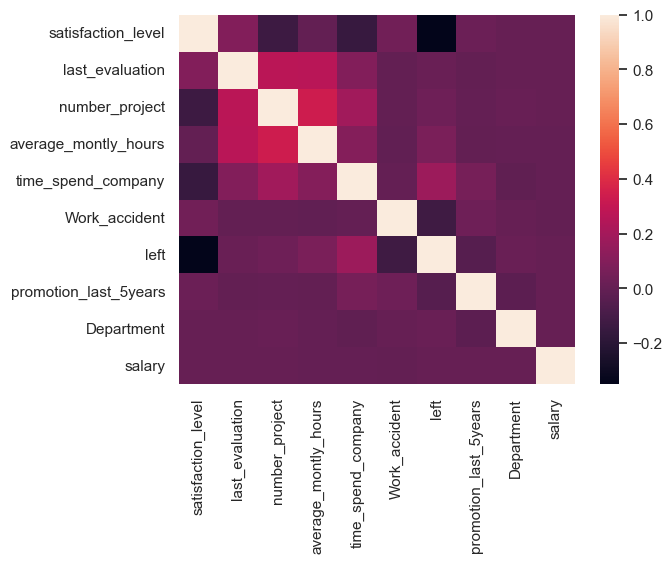

In [16]:
import seaborn as sns

# 繪製熱力圖
sns.heatmap(correlation_matrix)

## 分析結論

- satisfaction_level（滿意度）與 left 離職率呈現負相關（-0.35），表明滿意度低的員工離職的可能性較高。
- time_spend_company (年資) 與 left 離職率呈現正相關 (0.17)，年資高的員工較有可能離職

我們根據這兩個觀測去做延伸

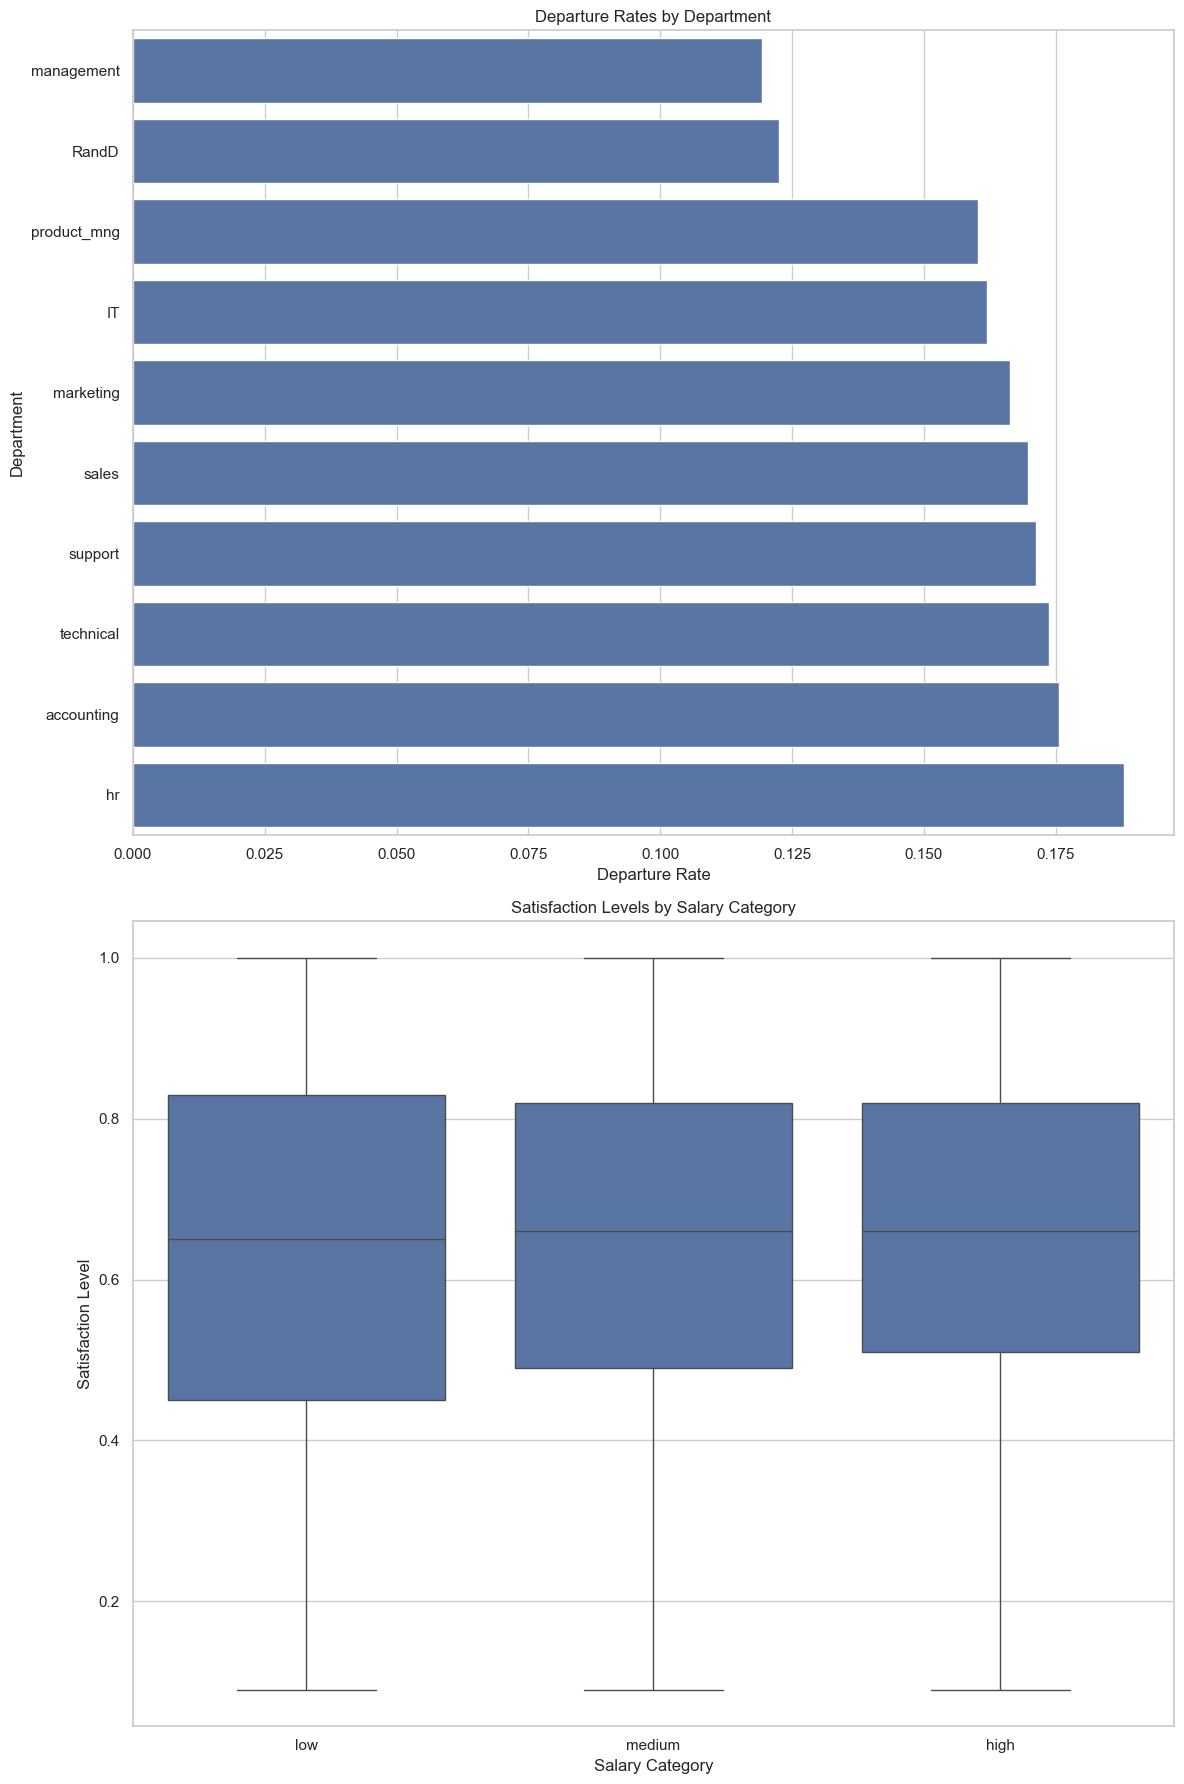

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# 設置繪圖風格
sns.set(style="whitegrid")

# 設定圖片的初始參數 2 個 row, 1 個 column, figsize 是圖片的大小
fig, ax = plt.subplots(2, 1, figsize=(12, 18)) # 這邊有 2 橫列的圖片

# 使用 seaborn 的 barplot 繪製長條圖
# 根據不同部門繪製不同部門的離職率
department_leave_rates = data.groupby('Department')['left'].mean().sort_values()
sns.barplot(x=department_leave_rates.values, y=label_enc_department.inverse_transform(department_leave_rates.index), ax=ax[0], orient="h")

# ax[0] 是指說第 0 號位置的圖，經過 plt.subplots(2, 1, figsize=(12, 18)) 設定後，總共會有第 0 號圖與第 1 號圖
ax[0].set_title('Departure Rates by Department')
# 設置 x 軸的 label
ax[0].set_xlabel('Departure Rate')
# 設置 y 軸的 label
ax[0].set_ylabel('Department')

# 根據薪資等級繪製滿意度等級的廂型圖
salary_satisfaction_boxplot = sns.boxplot(x=label_enc_salary.inverse_transform(data['salary']), y=data['satisfaction_level'], ax=ax[1])
ax[1].set_title('Satisfaction Levels by Salary Category')
ax[1].set_xlabel('Salary Category')
ax[1].set_ylabel('Satisfaction Level')

# 調整一下圖片的配置
plt.tight_layout()
plt.show()


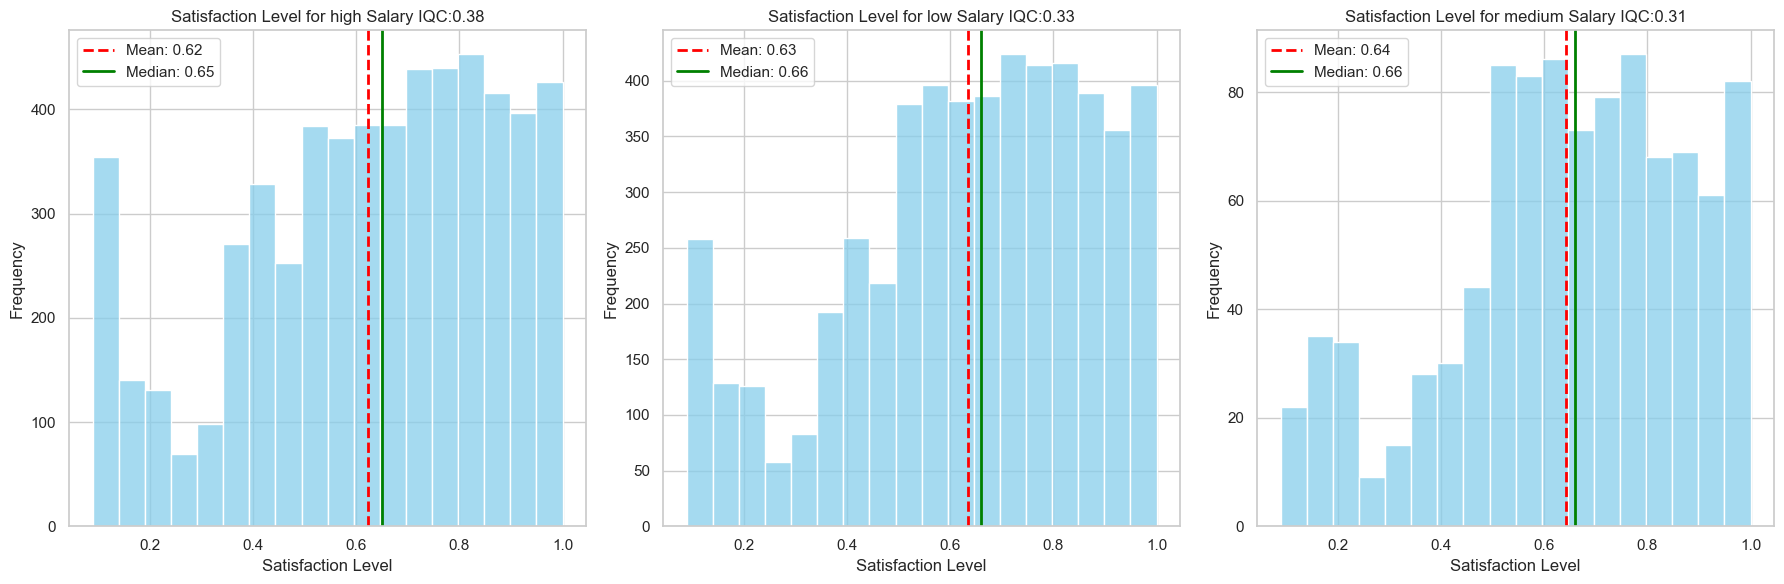

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 6))

# 根據不同薪資等級去繪製各自的直方圖 (hist)
for i, category in enumerate(data['salary'].unique(), 1):
    plt.subplot(1, 3, i)
    subset = data[data['salary'] == category]
    IQC = subset['satisfaction_level'].quantile(0.75) - subset['satisfaction_level'].quantile(0.25) 
    sns.histplot(subset['satisfaction_level'], color='skyblue', binwidth=0.05)
    
    mean_val = subset['satisfaction_level'].mean()
    median_val = subset['satisfaction_level'].median()
    
    # 繪製垂直線 v -> vertical 的意思
    plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    plt.axvline(median_val, color='green', linestyle='-', linewidth=2, label=f'Median: {median_val:.2f}')
    
    plt.title(f'Satisfaction Level for {label_enc_salary.classes_[category-1]} Salary IQC:{IQC:.2f}')
    plt.xlabel('Satisfaction Level')
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show()


## 分析結論
1. 不同部門的離職率
    - 這邊可以看出不同部門的離職機率有明顯的差異，而這邊的 HR 部門尤其最高
2. 依照薪資來看滿意度
    1. 從這邊可以得知到整體不同的薪資中位數與平均值相差無幾
    2. 高薪資等級的滿意度中低分區段有明顯的多人
    3. 高薪資的人的滿意度平均值也是三個類別中最低的
    4. 高薪資的人的四分位距離也是最寬的，可以顯示出，高薪資的人滿意度其實較於分散

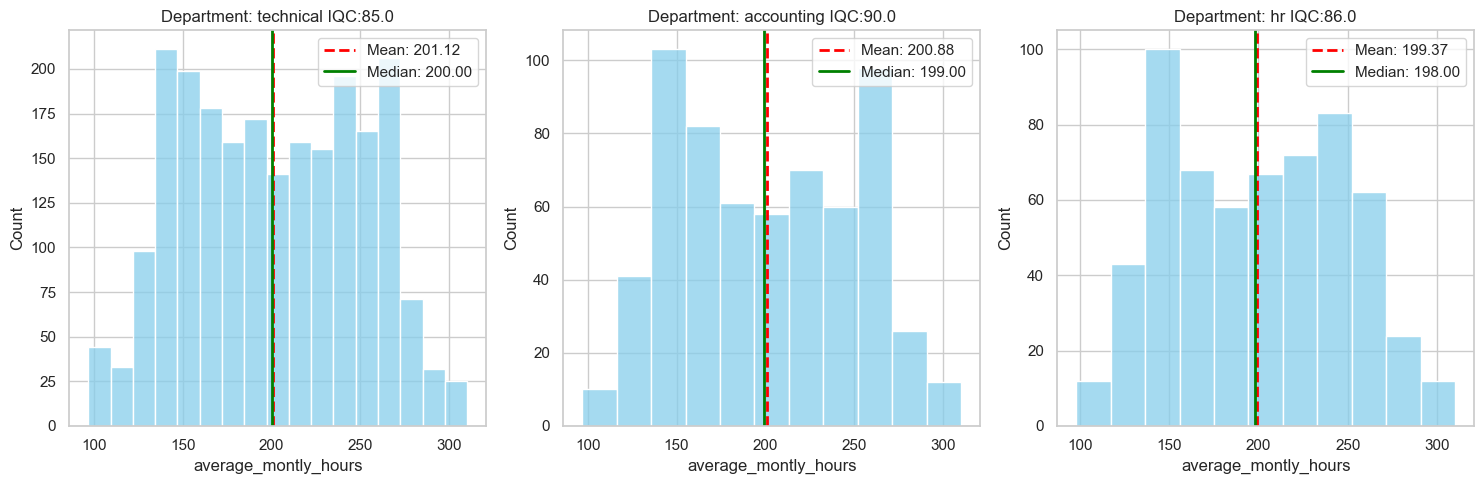

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 取出離職率前三高的部門
top_departments_by_leave_rate = department_leave_rates.tail(3).index

# 篩選出這些部門的人
data_top_departments = data[data['Department'].isin(top_departments_by_leave_rate)]

# 設定圖型大小
plt.figure(figsize=(15, 5))

# 對前三高離職率的部門觀測一下他們的分佈
for i, dept in enumerate(top_departments_by_leave_rate, 1):
    plt.subplot(1, 3, i)  
    subset = data_top_departments[data_top_departments['Department'] == dept]
    IQC = subset['average_montly_hours'].quantile(0.75) - subset['average_montly_hours'].quantile(0.25) 
    
    sns.histplot(subset["average_montly_hours"], kde=False, color='skyblue')
    
    
    mean_val = subset['average_montly_hours'].mean()
    median_val = subset['average_montly_hours'].median()

    plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    plt.axvline(median_val, color='green', linestyle='-', linewidth=2, label=f'Median: {median_val:.2f}')
    
    plt.title(f'Department: {label_enc_department.classes_[dept]} IQC:{IQC}')
    plt.legend()

plt.tight_layout()
plt.show()


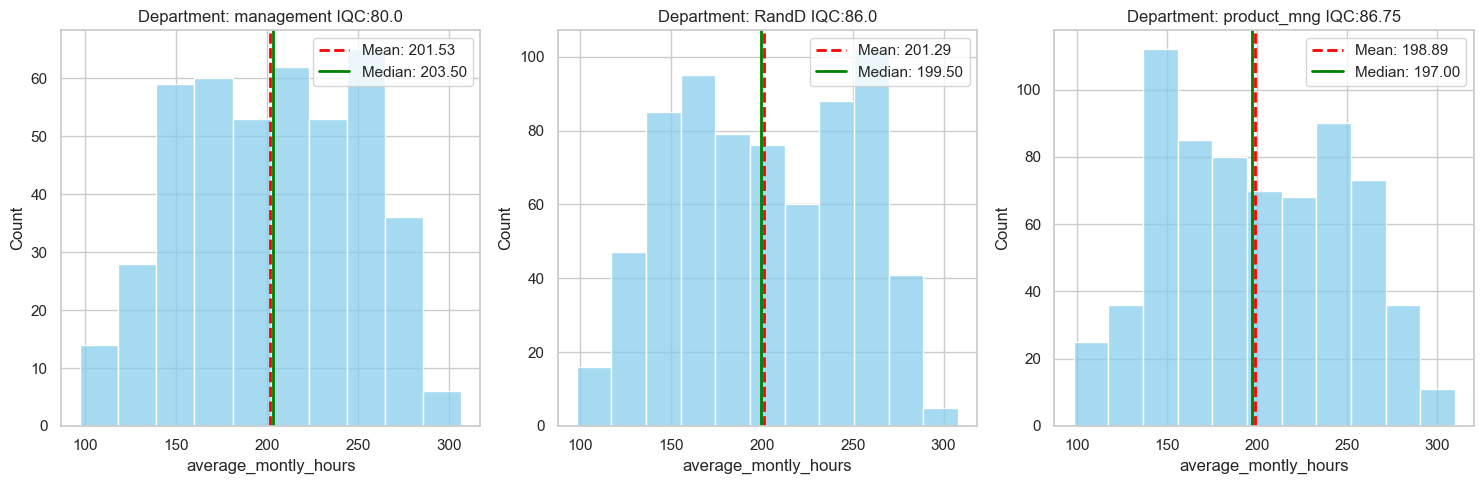

In [81]:
# 選出前三低離職率的部門
last_departments_by_leave_rate = department_leave_rates.head(3).index

# 篩選這些部門的人
data_top_departments = data[data['Department'].isin(last_departments_by_leave_rate)]

# 定義圖型大小
plt.figure(figsize=(15, 5))

# 對前三低離職率的部門觀測一下他們的分佈
for i, dept in enumerate(last_departments_by_leave_rate, 1):
    plt.subplot(1, 3, i)  
    subset = data_top_departments[data_top_departments['Department'] == dept]
    IQC = subset['average_montly_hours'].quantile(0.75) - subset['average_montly_hours'].quantile(0.25) 
    
    sns.histplot(subset["average_montly_hours"], kde=False, color='skyblue')
    
    
    mean_val = subset['average_montly_hours'].mean()
    median_val = subset['average_montly_hours'].median()

    plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    plt.axvline(median_val, color='green', linestyle='-', linewidth=2, label=f'Median: {median_val:.2f}')
    
    plt.title(f'Department: {label_enc_department.classes_[dept]} IQC:{IQC}')
    plt.legend()

plt.tight_layout()
plt.show()


## 結論
- 這邊的工時不是一個非常影響離職率的主要原因，可以看到不管是低離職率的部門與高離職率的部門，平均工時的平均值與中位數相差無幾

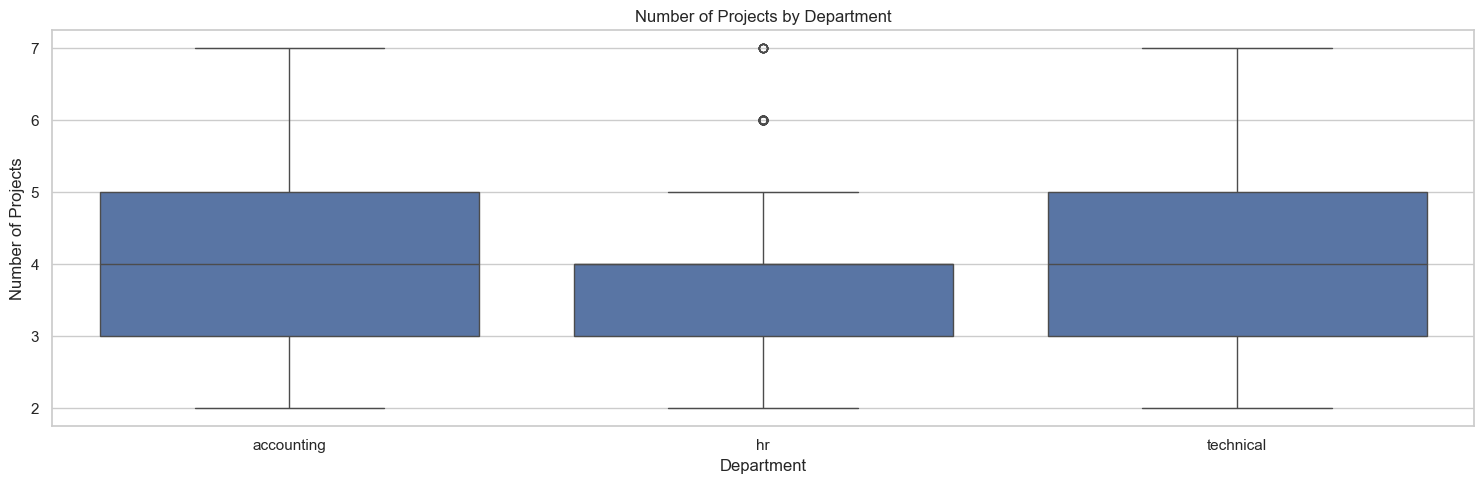

In [91]:
# 排序出最高離職率的三個部門
top_departments_by_leave_rate = department_leave_rates.tail(3).index

# 過濾出這三個部門的資料
data_top_departments = data[data['Department'].isin(top_departments_by_leave_rate)]

# 根據這三個部門各自的廂型圖繪製在同一個圖之中
plt.figure(figsize=(15, 5))

sns.boxplot(x=label_enc_department.inverse_transform(data_top_departments['Department']), y=data_top_departments['number_project'])
plt.title('Number of Projects by Department')
plt.xlabel('Department')
plt.ylabel('Number of Projects')

plt.tight_layout()
plt.show()


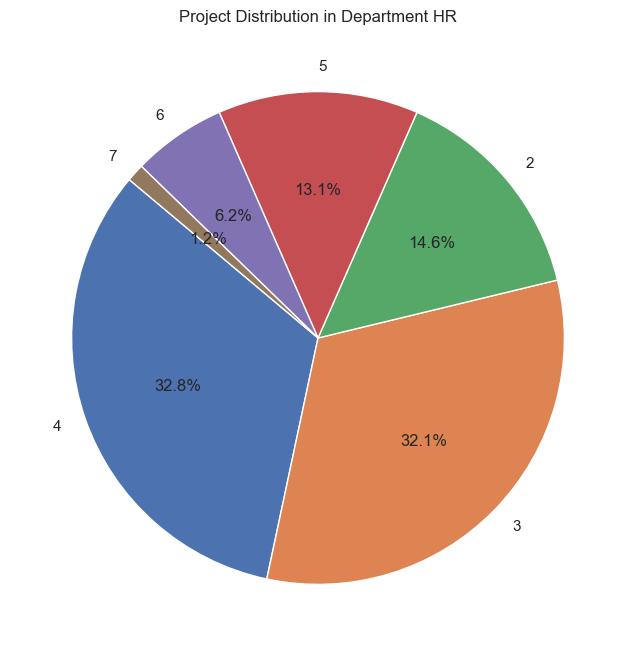

In [107]:
# 繪製 HR 部門的 project_counts
project_counts = data[data['Department'] == 3]["number_project"].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(project_counts, labels=project_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Project Distribution in Department HR')
plt.show()

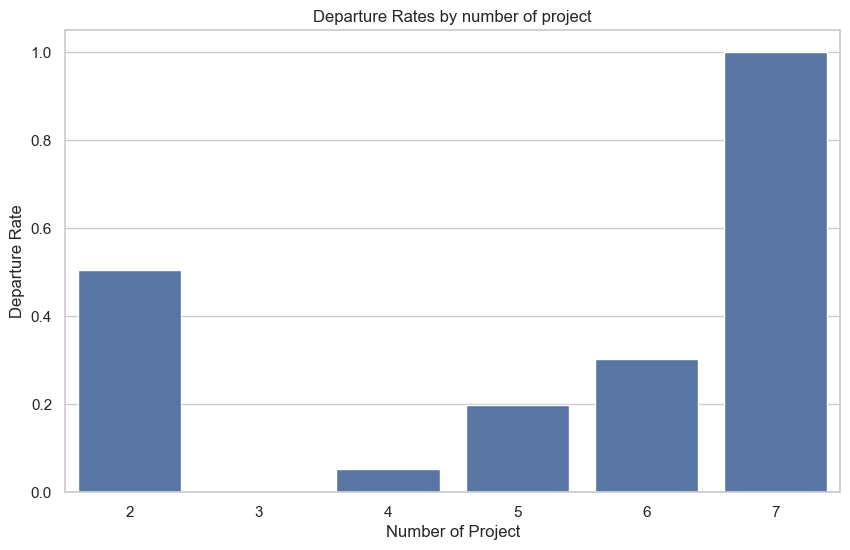

In [110]:
# HR 部門根據不同的 project_counts 繪製出各自的離職率
time_spend_company_leave_rates = subset.groupby('number_project')['left'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=time_spend_company_leave_rates.index, y=time_spend_company_leave_rates.values)
plt.title('Departure Rates by number of project')
plt.xlabel('Number of Project')
plt.ylabel('Departure Rate')
plt.show()


## 結論
- 由上圖們可以看出，HR 這個部門有部分的離群值，在深入去視覺化，會發現該部門的持有專案的數量分配不均，在過量的專案下面（7個專案時）的離職率達到 100%

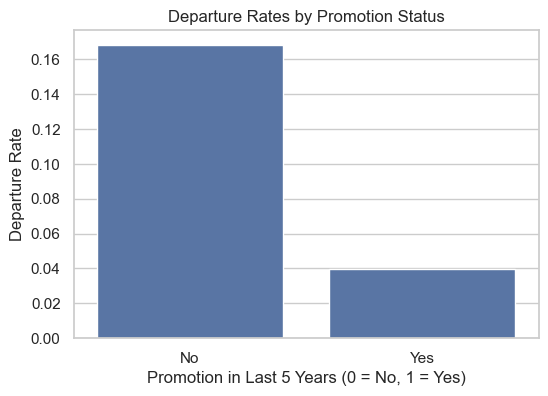

In [78]:
# Analyze the relationship between promotion in the last 5 years and employee departure
promotion_leave_rates = data.groupby('promotion_last_5years')['left'].mean()

# 繪製出五年內升遷與離職率的一個關係圖
plt.figure(figsize=(6, 4))
sns.barplot(x=promotion_leave_rates.index, y=promotion_leave_rates.values)
plt.title('Departure Rates by Promotion Status')
plt.xlabel('Promotion in Last 5 Years (0 = No, 1 = Yes)')
plt.ylabel('Departure Rate')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

## 結論
- 這邊可以觀測到，該欄位大大的影響到了離職率這件事情，可以看到在過去五年沒有晉升的人離職率是有晉升的4倍以上

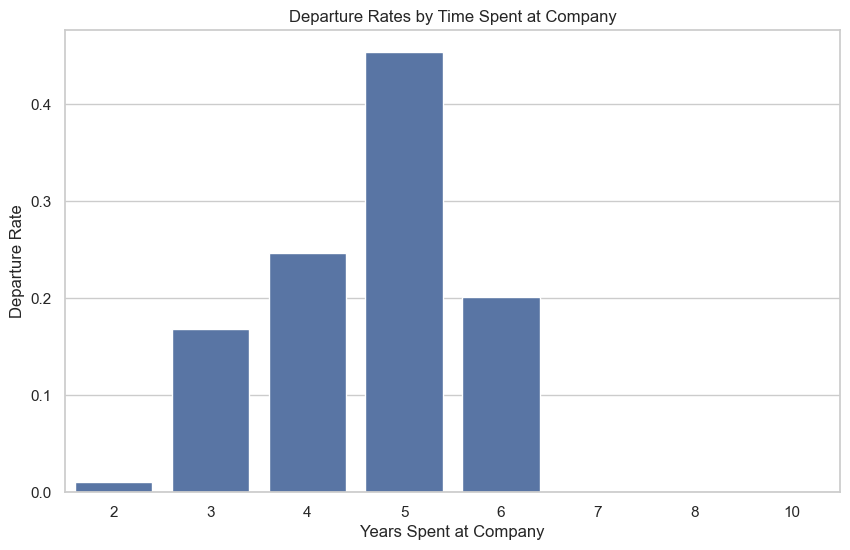

In [83]:
# Analyze the relationship between time spent at the company and departure rate
time_spend_company_leave_rates = data.groupby('time_spend_company')['left'].mean()

# Plot the relationship between time spent at the company and departure rate
plt.figure(figsize=(10, 6))
sns.barplot(x=time_spend_company_leave_rates.index, y=time_spend_company_leave_rates.values)
plt.title('Departure Rates by Time Spent at Company')
plt.xlabel('Years Spent at Company')
plt.ylabel('Departure Rate')
plt.show()


## 結論 年資與離職率的關係分析

圖中顯示了員工在公司的年資與離職率關係

- 年資較短的（2-3年）的員工離職率較低。
- 隨著工作年資的增加（尤其是在4-5年期間），離職率顯著提升。

## 結論和策略建議
- 這些分析揭示了幾個關鍵因素可能導致員工離職，包括晉升的缺乏、以及一定年限後的職業穩定性減少。基於這些發現，公司可以考慮以下策略：

1. 改進晉升機制：確保有公正和透明的晉升路徑，特別是對那些表現出色的員工。
2. 員工發展和支持計劃：為員工提供更多的培訓和發展機會，尤其是對於中期員工（工作4-5年的員工）來說，提供職業規劃和發展支持可能有助於減少離職。
3. 工作負載管理：對高壓部門進行工作重新分配使得員工的工作分配量平均，以減輕員工負擔。